# Colon Cancer Image Classification

In [ ]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# setting the training data directory
DataDir = r"/content/drive/MyDrive/Colon Cancer Image Classification/Training the Data/"

In [ ]:
# intiallizing the category of classification
CATEGORIES = ["Cancerous", "Normal"]

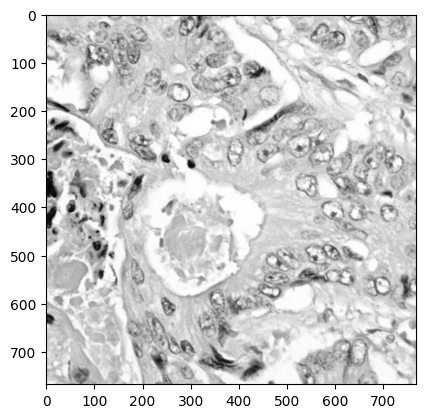

In [ ]:
# converting the images into grayscale #means there is no need of creating convolutional network
for i in CATEGORIES:
    path=os.path.join(DataDir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [ ]:
# intializing the size of the image so that every image should be in same dimension
img_size=100

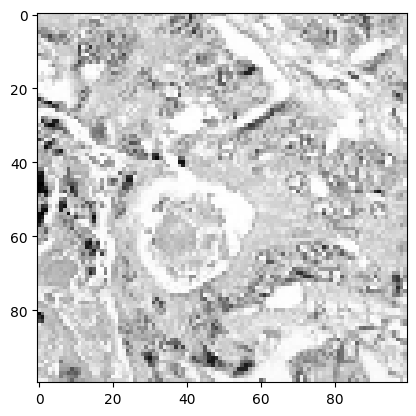

In [ ]:
# image after resize and gray scale
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [ ]:
training_data=[]

In [ ]:
# defining the function for training data according to the categories converting the images into gray scale with resizing the image into 100 x 100
# converting it into numpy arrays
def create_training_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])

            except Exception as e:
                pass

In [ ]:
create_training_data()

In [ ]:
print(len(training_data))

110


In [ ]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)

[array([[221, 229, 193, ..., 232, 231, 228],
       [181, 226, 170, ..., 232, 234, 231],
       [157, 224, 164, ..., 232, 236, 234],
       ...,
       [242, 235, 241, ..., 232, 214, 212],
       [246, 240, 240, ..., 230, 197, 195],
       [244, 242, 238, ..., 223, 198, 181]], dtype=uint8), 1]
[array([[229, 222, 178, ..., 244, 245, 247],
       [237, 236, 235, ..., 245, 248, 247],
       [246, 242, 241, ..., 246, 244, 247],
       ...,
       [243, 242, 220, ..., 180, 181, 156],
       [251, 237, 223, ..., 137, 166, 116],
       [240, 237, 220, ..., 189, 161, 172]], dtype=uint8), 1]
[array([[191, 190, 186, ..., 174, 193, 221],
       [188, 191, 189, ..., 172, 155, 139],
       [181, 183, 193, ..., 162, 141,  61],
       ...,
       [216, 209, 183, ..., 180, 234, 250],
       [208, 203, 172, ..., 203, 241, 245],
       [217, 216, 185, ..., 228, 244, 242]], dtype=uint8), 0]
[array([[247, 247, 244, ..., 204, 208, 191],
       [245, 245, 246, ..., 198, 215, 176],
       [245, 245, 246, ...

In [ ]:
X=[]
y=[]

In [ ]:
# spliting the features and labels
for features,label in training_data:
    X.append(features)
    y.append(label)

In [ ]:
print(X[0].reshape(-1,img_size,img_size,1))

[[[[221]
   [229]
   [193]
   ...
   [232]
   [231]
   [228]]

  [[181]
   [226]
   [170]
   ...
   [232]
   [234]
   [231]]

  [[157]
   [224]
   [164]
   ...
   [232]
   [236]
   [234]]

  ...

  [[242]
   [235]
   [241]
   ...
   [232]
   [214]
   [212]]

  [[246]
   [240]
   [240]
   ...
   [230]
   [197]
   [195]]

  [[244]
   [242]
   [238]
   ...
   [223]
   [198]
   [181]]]]


In [ ]:
y = np.array(y)

In [ ]:
# reshapping the features for making it compatible with tensorflow
X = np.array(X).reshape(-1,img_size,img_size,1)

In [ ]:
# as we do for training data similiarly doing with validation data
validation_data=[]
DataDir_val= r"/content/drive/MyDrive/Colon Cancer Image Classification/Validation"

In [ ]:
def create_validating_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir_val,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                validation_data.append([new_array,class_num])

            except Exception as e:
                pass

In [ ]:
create_validating_data()
print(len(validation_data))

34


In [ ]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
    print(sample)

[array([[172, 190, 146, ..., 236, 237, 230],
       [162, 199, 172, ..., 241, 241, 237],
       [147, 192, 192, ..., 246, 244, 244],
       ...,
       [249, 249, 248, ..., 127, 135, 130],
       [247, 247, 249, ..., 151, 140, 131],
       [248, 248, 249, ..., 141, 147, 154]], dtype=uint8), 1]
[array([[137, 164, 158, ..., 147, 147, 145],
       [154, 166, 153, ..., 161, 153, 146],
       [152, 171, 177, ..., 152, 152, 152],
       ...,
       [236, 206, 182, ..., 211, 226, 223],
       [220, 214, 200, ..., 211, 219, 228],
       [205, 211, 211, ..., 222, 227, 240]], dtype=uint8), 1]
[array([[231, 235, 245, ..., 249, 232, 162],
       [181, 195, 224, ..., 248, 178, 129],
       [181, 194, 193, ..., 225, 143, 121],
       ...,
       [206, 186, 195, ..., 188, 212, 146],
       [171, 164, 192, ..., 158, 193, 184],
       [138, 121, 136, ..., 159, 200, 187]], dtype=uint8), 1]
[array([[239, 240, 241, ...,  40,  45,  78],
       [233, 233, 238, ...,  49,  55, 154],
       [226, 234, 228, ...

In [ ]:
X_val=[]
y_val=[]

In [ ]:
for features,label in validation_data:
    X_val.append(features)
    y_val.append(label)

In [ ]:
y_val = np.array(y_val)
X_val=np.array(X_val).reshape(-1,img_size,img_size,1)

In [ ]:
# importing the library for training the model and adding the neural network layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten, Conv2D,MaxPooling2D
import pickle

In [ ]:
# Pixels value ranges from 0 to 255, 0 means black, 255 means white....
# In order to scale it down to a scale of 0 to 1, we are performing this step
X = X/255.0
x_val = X_val/255.0

In [ ]:
X.shape

(110, 200, 200, 1)

In [ ]:
x_val.shape

(34, 200, 200, 1)

In [ ]:
# intializing the neural network layer for training the model
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 198, 198, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 198, 198, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 99, 99, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 99, 99, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 97, 97, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 97, 97, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 46, 46, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 46, 46, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 23, 23, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 23, 23, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 135424)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     8,667,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,036,929 (34.47 MB)

 Trainable params: 9,036,929 (34.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# fittting the model with 10 epochs and using the validation data we have created
model.fit(X,y,batch_size=4,epochs=10,validation_data=(x_val, y_val))

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 195ms/step - accuracy: 0.4475 - loss: 4.6994 - val_accuracy: 0.8529 - val_loss: 0.6906
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.5506 - loss: 0.6927 - val_accuracy: 0.8529 - val_loss: 0.6781
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5088 - loss: 0.6930 - val_accuracy: 0.8529 - val_loss: 0.6787
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5369 - loss: 0.6919 - val_accuracy: 0.8529 - val_loss: 0.6662
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4962 - loss: 0.6934 - val_accuracy: 0.8529 - val_loss: 0.6643
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5598 - loss: 0.6882 - val_accuracy: 0.8529 - val_loss: 0.6583
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5015 - loss: 0.6930 - val_accuracy: 0.8529 - val_loss: 0.6551
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4809 - loss: 0.6944 - val_accuracy: 0.8529 -

In [ ]:
# saving the model
model.save(r"/content/drive/MyDrive/Colon Cancer Image Classification/model_10.h5")

In [ ]:
# importing the library for testing the model
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

In [ ]:
CATEGORIES = ["Normal", "Cancerous"]

In [ ]:
# function for preparing the image for predicting the class
def prepare(image):
    img_size=100
    #img_array=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
    img=tf.keras.preprocessing.image.load_img(image, target_size=(img_size,img_size))
    new_array=tf.keras.preprocessing.image.img_to_array(img)

    return new_array.reshape(-1,img_size,img_size,3)

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/Colon Cancer Image Classification/model_10.h5")

In [ ]:
image = r'/content/drive/MyDrive/Colon Cancer Image Classification/Testing the Data/Cancerous/colonca1212.jpeg'

In [ ]:
# evaluate the model on test data
test_dir = '/content/drive/MyDrive/Colon Image Classification/test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(img_size, img_size), batch_size=32, class_mode='binary', shuffle=False)
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

Found 624 images belonging to 2 classes.
20/20 [==============================] - 8s 324ms/step - loss: 0.2372 - accuracy: 0.9103
Test accuracy: 0.9102563858032227
